In [1]:
import numpy as np
import pickle
import cv2
import tensorflow as tf
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras import backend as k
from tensorflow.python.keras.layers import Input, Dense
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D,Conv2D,Input,Add,Flatten,AveragePooling2D,Dense,BatchNormalization,ZeroPadding2D,Activation,Dropout
from tensorflow.keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

In [ ]:
EPOCHS = 15
BS = 32
image_size=256
channels=3
directory_root="C:/Users/suday/OneDrive/Desktop/Main_project/own_dataset"

In [3]:
dataset=tf.keras.utils.image_dataset_from_directory(
    directory_root,
    shuffle=True,
    batch_size=BS,
    image_size=(image_size, image_size),
)

Found 6000 files belonging to 10 classes.


In [4]:
class_names=dataset.class_names
class_names

['C0', 'C1', 'C2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']

In [8]:
def get_dataset_size(dataset,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(dataset)
    if shuffle:
        ds=dataset.shuffle(shuffle_size,seed=12)
    train_size=int(train_split *ds_size)
    val_size=int(val_split*ds_size)
    train_ds=dataset.take(train_size)
    val_ds=dataset.skip(train_size).take(val_size)
    test_ds=dataset.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [9]:
train_ds,val_ds,test_ds=get_dataset_size(dataset)

In [11]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [12]:
resize_and_rescale=tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(image_size,image_size),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [13]:
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [14]:
import tensorflow as tf
from tensorflow.keras import layers

input_shape = (BS, image_size, image_size, channels)
n_classes = 10

model = tf.keras.models.Sequential([
    resize_and_rescale,
    data_augmentation,
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)


In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [16]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [17]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BS,   
    verbose=1,
    validation_data=val_ds
)

Epoch 1/15


150/150 [==============================] - 660s 4s/step - loss: 2.2747 - accuracy: 0.1581 - val_loss: 1.9673 - val_accuracy: 0.3056
Epoch 2/15
150/150 [==============================] - 553s 4s/step - loss: 1.9375 - accuracy: 0.2798 - val_loss: 1.6418 - val_accuracy: 0.4201
Epoch 3/15
150/150 [==============================] - 565s 4s/step - loss: 1.5561 - accuracy: 0.4485 - val_loss: 1.2260 - val_accuracy: 0.5938
Epoch 4/15
150/150 [==============================] - 567s 4s/step - loss: 1.1688 - accuracy: 0.5913 - val_loss: 0.8803 - val_accuracy: 0.7222
Epoch 5/15
150/150 [==============================] - 509s 3s/step - loss: 0.8786 - accuracy: 0.6977 - val_loss: 0.6483 - val_accuracy: 0.7917
Epoch 6/15
150/150 [==============================] - 552s 4s/step - loss: 0.7193 - accuracy: 0.7506 - val_loss: 0.6577 - val_accuracy: 0.7760
Epoch 7/15
150/150 [==============================] - 523s 3s/step - loss: 0.5796 - accuracy: 0.8004 - val_loss: 0.5114 - val_accuracy: 0.84

In [18]:
scores=model.evaluate(test_ds)


20/20 [==============================] - 24s 356ms/step - loss: 0.2383 - accuracy: 0.9343


In [19]:
scores

[0.23826934397220612, 0.9342948794364929]

In [20]:
history

In [21]:
history.params

{'verbose': 1, 'epochs': 15, 'steps': 526}

In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [23]:
len(history.history['accuracy'])

15

In [22]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training & Validation Accuracy')

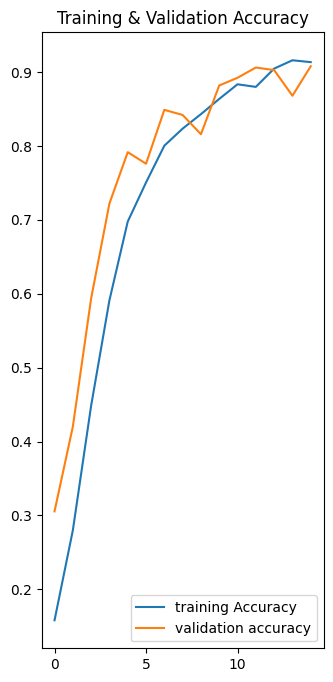

In [23]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='validation accuracy')
plt.legend(loc='lower right')
plt.title('Training & Validation Accuracy')

First image to predict
First image Actual label name : C1
1/1 [==============================] - 0s 355ms/step
[1.59799281e-04 9.10689533e-01 5.32945751e-06 8.83082673e-02
 1.75522228e-08 7.20151176e-04 1.15640534e-04 3.28426182e-07
 9.79001584e-07 3.03557700e-11 2.70596737e-14 8.24230545e-11
 2.74061524e-12 1.85623936e-13 9.03045135e-14 6.46034305e-16
 1.42274972e-14]
1
Prediction label:  C1


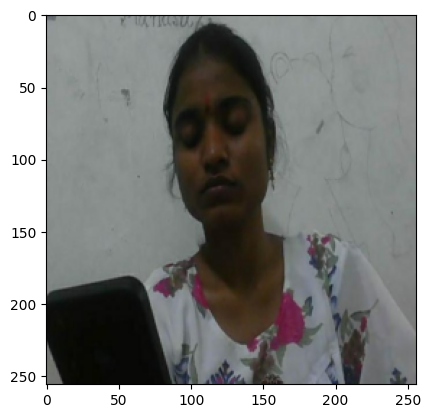

In [26]:
for images_batch,labels_batch in test_ds.take(1):
    first_image= images_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0]
    print("First image to predict")
    plt.imshow(first_image)
    print("First image Actual label name :", class_names[first_label])
    batch_prediction = model.predict(images_batch)
    print(batch_prediction[0])
    print(np.argmax(batch_prediction[0]))
    print("Prediction label: ",class_names[np.argmax(batch_prediction[0])])

In [27]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0) 
    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 [==============================] - 0s 74ms/step


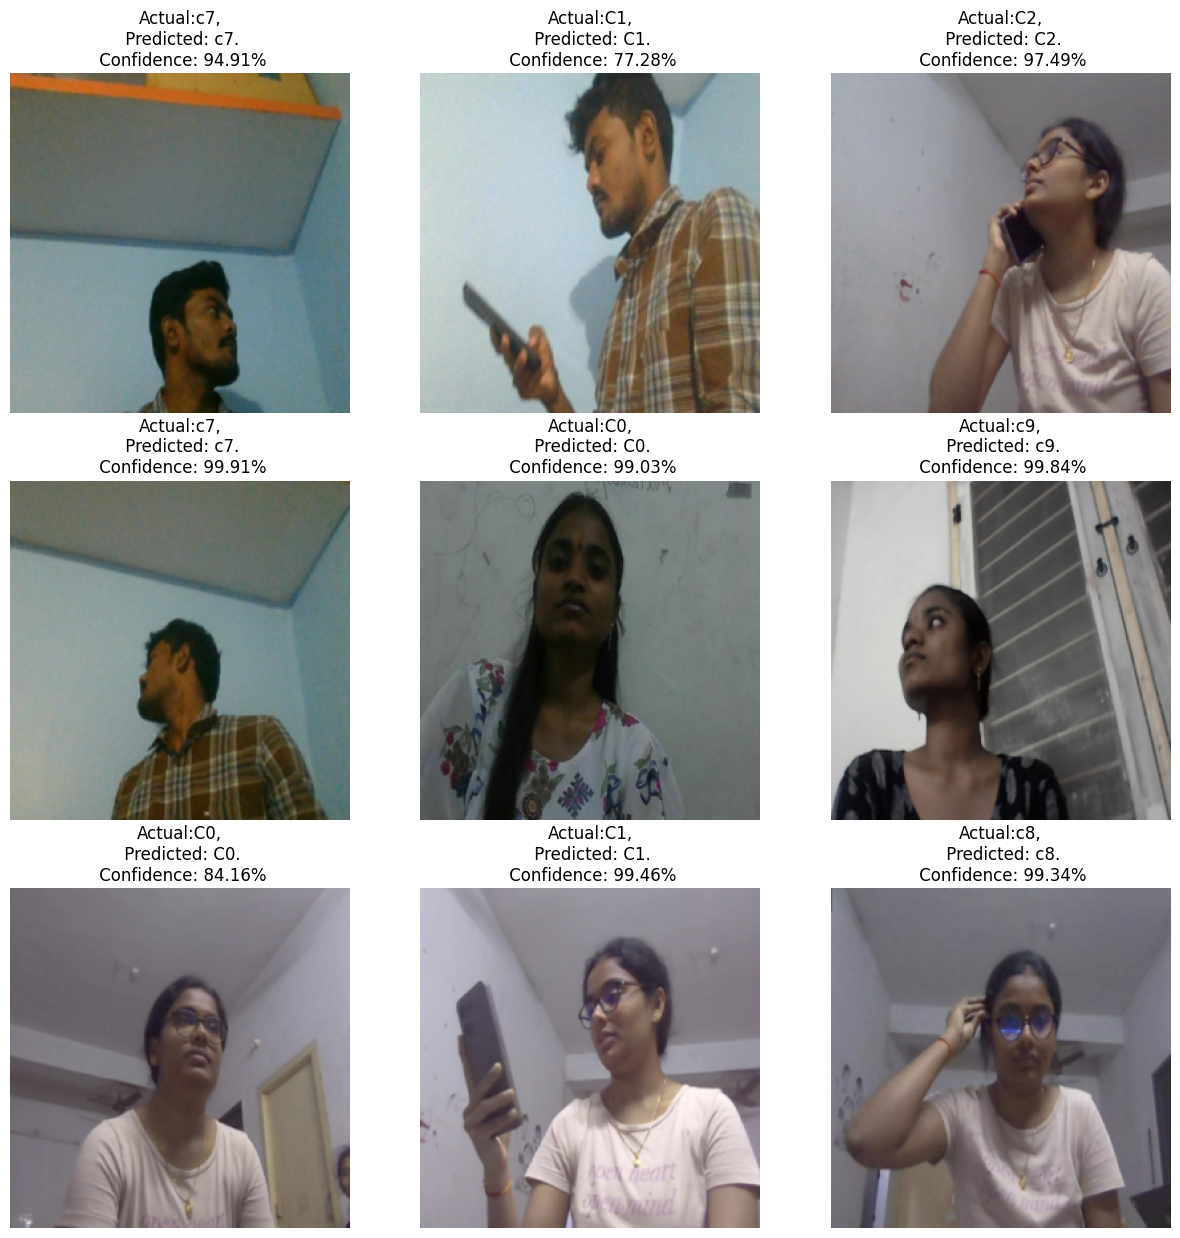

In [28]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class,confidence = predict(model, images[i].numpy())
        actual_class=class_names[labels[i]]
        
        plt.title(f"Actual:{actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [29]:
# Save the model as HDF5 file
model_hdf5_path = "C:/Users/Lenovo/Desktop/Driver-Distraction-Detection/Training Notebooks/model/model2.h5"
model.save(model_hdf5_path)
print("Model saved as HDF5 file:", model_hdf5_path)


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved as HDF5 file: C:/Users/Lenovo/Desktop/Driver-Distraction-Detection/Training Notebooks/model/model2.h5


In [34]:
# Load the model from HDF5 file
loaded_model_hdf5 = tf.keras.models.load_model(model_hdf5_path)
print("Model loaded from HDF5 file:", model_hdf5_path)


# Test the loaded model with a sample image
sample_image_path = "C:/Users/Lenovo/Desktop/Driver-Distraction-Detection/Training Notebooks/own_dataset/valid/c9/c9_original_0b7f7c00-ec4b-11ee-9000-48efe7403601.jpg_86e867e4-b650-48f1-b316-e8294d7953f9.jpg" # Provide the path to your sample image
sample_image = tf.keras.preprocessing.image.load_img(sample_image_path, target_size=(image_size, image_size))
sample_image = tf.keras.preprocessing.image.img_to_array(sample_image)
sample_image = np.expand_dims(sample_image, axis=0)

# Predict using the model loaded from HDF5 file
predictions_hdf5 = loaded_model_hdf5.predict(sample_image)
predicted_class_hdf5 = class_names[np.argmax(predictions_hdf5[0])]
print("Predicted class (HDF5):", predicted_class_hdf5)



Model loaded from HDF5 file: C:/Users/Lenovo/Desktop/Driver-Distraction-Detection/Training Notebooks/model/model2.h5
1/1 [==============================] - 0s 389ms/step
Predicted class (HDF5): c9
